In [28]:
import random
from operator import itemgetter
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

None
[(474, 48), (229, 434), (195, 251), (48, 253), (116, 88), (376, 222), (152, 180), (63, 275), (159, 337), (92, 10), (37, 47), (122, 432), (152, 427), (265, 36), (227, 269), (124, 48), (339, 275), (293, 175), (177, 453), (167, 42), (360, 51), (337, 444), (358, 240), (289, 27), (413, 459), (169, 185), (47, 479), (180, 170), (403, 177), (317, 426), (369, 89), (494, 191), (435, 157), (491, 285), (41, 416), (436, 428), (378, 452), (414, 232), (378, 215), (309, 129), (87, 101), (94, 454), (128, 173), (156, 114), (282, 183), (153, 378), (213, 470), (500, 275), (453, 118), (141, 339), (197, 31), (211, 63), (352, 118), (56, 89), (408, 325), (114, 332), (282, 152), (344, 48), (410, 455), (361, 42), (168, 332), (427, 165), (71, 287), (412, 377), (54, 143), (283, 408), (265, 423), (85, 226), (175, 328), (453, 13), (374, 21), (423, 58), (269, 331), (206, 202), (114, 355), (348, 394), (398, 247), (420, 180), (234, 245), (413, 493), (139, 442), (15, 34), (90, 371), (371, 322), (264, 427), (385, 3

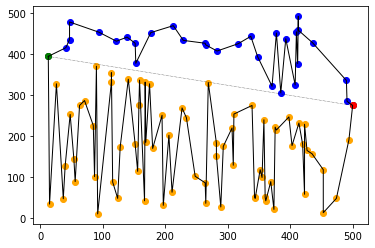

In [83]:
class Create_random_polygon:
    
    def __init__(self, array, p0 = None, pn = None, num_points = None):   
        self.array = array
        self.p0 = p0    #p0=min.coord 
        self.pn = pn   #pn=max.coord
        self.num_points = num_points  #num_points=ordered Pair.
    def generate_random_points(self):
        random_coords_list = []
        for x in range(self.num_points):
            coords_tuple = (random.randint(self.p0, self.pn),
                            random.randint(self.p0, self.pn))
            random_coords_list.append(coords_tuple)
        self.array = random_coords_list
        return random_coords_list
    
    def close_line_to_polygon(self):
        a = self.array[0]
        b = self.array[len(self.array)-1]
        if a == b:
            pass
        else:
            self.array.append(a)    

    def leftmost_point(self):
        leftmost_point = None
        leftmost_x = None
        for point in self.array:
            x = point[0]
            y = point[1]
            if (leftmost_x == None) or (x < leftmost_x )or (x== leftmost_x )and (y<leftmost_y):
                leftmost_x = x
                leftmost_y = y
                leftmost_point = point
        return leftmost_point

    def rightmost_point(self):
        rightmost_point = None
        rightmost_x = None
        for point in self.array:
            x = point[0]
            y = point[1]
            if (rightmost_x == None) or (x > rightmost_x) or (x== rightmost_x )and (y<rightmost_y):
                rightmost_x = x
                rightmost_y = y
                rightmost_point = point
        return rightmost_point

    def point_above_the_line(self, point, LineString):
        
        px, py = point
        P1, P2 = LineString
        P1x, P1y = P1[0], P1[1]
        P2x, P2y = P2[0], P2[1]
        array = numpy.array([
            [P1x - px, P1y - py],
            [P2x - px, P2y - py],
            ])
        det = numpy.linalg.det(array)
        sign = numpy.sign(det)
        return sign
    
    def sort_array_into_A_B_C(self, LineString):
        [(x_lm, y_lm), (x_rm, y_rm)] = LineString
        A_array, B_array, C_array = [], [], []
        for point in self.array:
            x, y = point
            sing = self.point_above_the_line( (x, y), LineString)
            if sing == 0:
                C_array.append(point)
            elif sing == -1:
                A_array.append(point)
            elif sing == 1:
                B_array.append(point)
        return A_array, B_array, C_array

    def sort_and_merge_A_B_C_arrays(self, A_array, B_array, C_array):
        A_C_array = [*A_array, *C_array]
        A_C_array.sort(key=itemgetter(0))
        B_array.sort(key=itemgetter(0), reverse=True)        
        merged_arrays = [*A_C_array, *B_array]
        self.array = merged_arrays

    def show_image(self, array, LineString, A_array, B_array, C_array):
        [(x_lm, y_lm), (x_rm, y_rm)] = LineString        
        x = [x[0] for x in array]
        y = [y[1] for y in array]
        Ax = [x[0] for x in A_array]
        Ay = [y[1] for y in A_array]
        Bx = [x[0] for x in B_array]
        By = [y[1] for y in B_array]
        Cx = [x[0] for x in C_array]
        Cy = [y[1] for y in C_array]          
        plt.plot(Ax, Ay, 'o', c='orange') # below the line
        plt.plot(Bx, By, 'o', c='blue') # above the line
        plt.plot(Cx, Cy, 'o', c='black') # on the line
        plt.plot(x_lm, y_lm, 'o', c='green') # leftmost point
        plt.plot(x_rm, y_rm, 'o', c='red') # rightmost point
        x_plot = plt.plot([x_lm, x_rm], [y_lm, y_rm], linestyle=':', color='black', linewidth=0.5) # polygon's division line
        plt.plot(x, y, color='black', linewidth=1) # connect points by line in order of apperiance        
        plt.show()

    def main(self, plot = False):
        print(self.array)
        if self.array == None:
            if not all(
                [isinstance(p0, int),
                 isinstance(pn, int),
                 isinstance(num_points, int),]
                ):
                pass
            else:                
                self.array = self.generate_random_points()            

        print(self.array)
        x_lm, y_lm = self.leftmost_point()
        x_rm, y_rm = self.rightmost_point()
        LineString = [(x_lm, y_lm), (x_rm, y_rm)]

        A_array, B_array, C_array = self.sort_array_into_A_B_C(LineString)
        self.sort_and_merge_A_B_C_arrays(A_array, B_array, C_array)
        self.close_line_to_polygon()
        if plot:
            self.show_image(self.array, LineString, A_array, B_array, C_array)
        return self.array

if __name__ == "__main__":
    array = None 
    p0= 1
    pn = 500
    num_points = 100
    
    crt = Create_random_polygon(array, p0, pn, num_points)
    polygon_array = crt.main(plot = True)    